In [1]:
import torch
import numpy as np
from ANN_model import Features12_NN, Features12_NN2
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

In [2]:
BATCH_SIZE = 100
RANDOM_STATE = 42
CLEANED = True

if CLEANED:
    X = np.load('Numeric_feature_dataset/features12_train_cleaned.npy')
    y = np.load('Numeric_feature_dataset/target_train_cleaned.npy')
    print('Using cleaned data')
else:
    X = np.load('Numeric_feature_dataset/features12_train.npy')
    y = np.load('Numeric_feature_dataset/target_train.npy')

train_dataset = Features12_dataset(X, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X, y, train=False, random_state=RANDOM_STATE)
print('Total num of data:', train_dataset.__len__()+test_dataset.__len__())
y_scaler_train = train_dataset.get_y_scaler()
y_scaler_test = test_dataset.get_y_scaler()

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.__len__(), shuffle=False)

Using cleaned data
Total num of data: 11750


In [3]:
model = Features12_NN2()
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, y_scaler_train, y_scaler_test, num_epochs=1000, lr=0.01, weight_decay=1e-4, factor=0.5, min_lr=1e-6, patience=50, threshold=0.001)

[Epoch 1/1000] train_loss: 0.051105, test_loss: 0.025345 | train_mape: 35.2724, test_mape: 25.8170
[Epoch 2/1000] train_loss: 0.024410, test_loss: 0.021414 | train_mape: 27.1857, test_mape: 24.5835
[Epoch 3/1000] train_loss: 0.019147, test_loss: 0.016039 | train_mape: 23.8884, test_mape: 19.7184
[Epoch 4/1000] train_loss: 0.013572, test_loss: 0.014499 | train_mape: 20.1564, test_mape: 18.6962
[Epoch 5/1000] train_loss: 0.012597, test_loss: 0.010445 | train_mape: 19.2521, test_mape: 17.8306
[Epoch 6/1000] train_loss: 0.012160, test_loss: 0.011130 | train_mape: 18.9588, test_mape: 17.7517
[Epoch 7/1000] train_loss: 0.010920, test_loss: 0.010696 | train_mape: 18.0170, test_mape: 16.6352
[Epoch 8/1000] train_loss: 0.010957, test_loss: 0.010689 | train_mape: 17.9554, test_mape: 17.6772
[Epoch 9/1000] train_loss: 0.010630, test_loss: 0.010133 | train_mape: 17.7165, test_mape: 16.5754
[Epoch 10/1000] train_loss: 0.010498, test_loss: 0.009850 | train_mape: 17.5781, test_mape: 17.1885
[Epoch 11

In [4]:
from Utils import save_with_unique_name 
#### 記得改檔名 ####
filename = 'Models/features12_model8.pt'
filename = save_with_unique_name(filename)
torch.save(model_trained.state_dict(), filename)

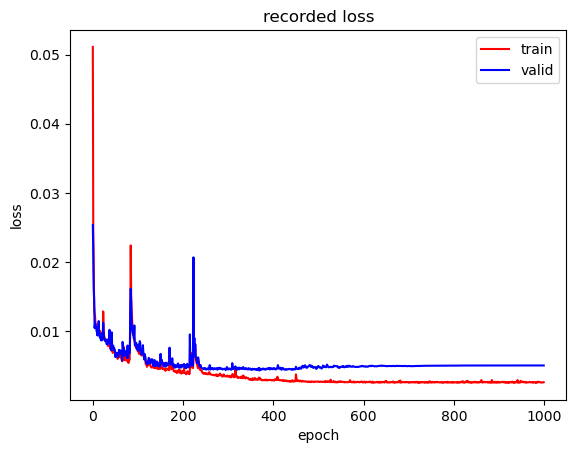

In [5]:
loss_plot(trainloss, testloss)

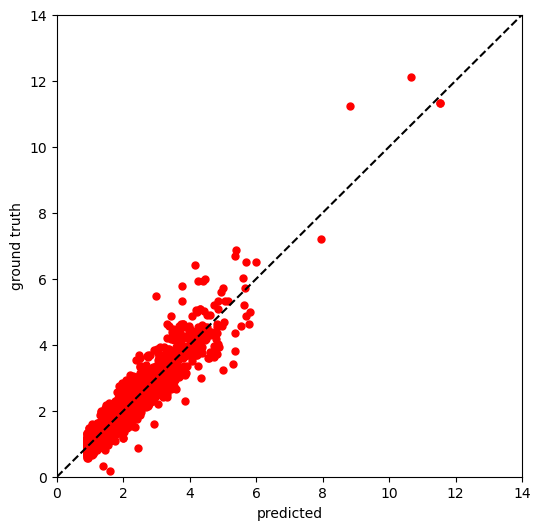

In [6]:
from Utils import true_pred_plot, model_pred

pred_test, true_test = model_pred(model_trained, test_loader, y_scaler_test)
true_pred_plot(pred_test, true_test)

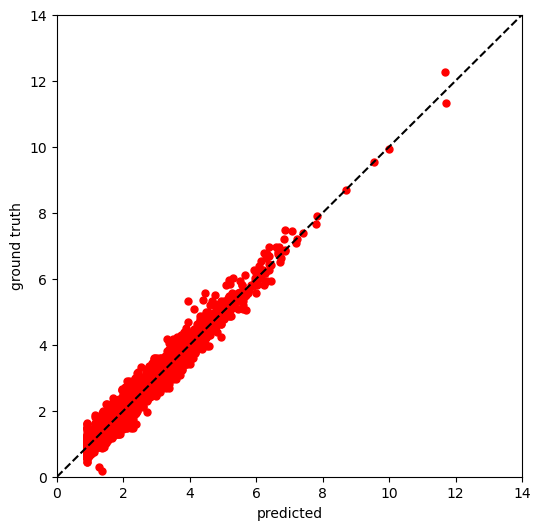

In [7]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
pred_train, true_train = model_pred(model_trained, train_loader, y_scaler_train)
true_pred_plot(pred_train, true_train)